In [1]:
from basicNN_module import basicNN
from basicNN_train import basicNN_train
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from torch.optim import SGD

#### basicNN 

In [2]:
input_doses = torch.linspace(start=0, end=1, steps=11)
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [3]:
model = basicNN()

In [4]:
output_values = model(input_doses)


Text(0.5, 0, 'Dose')

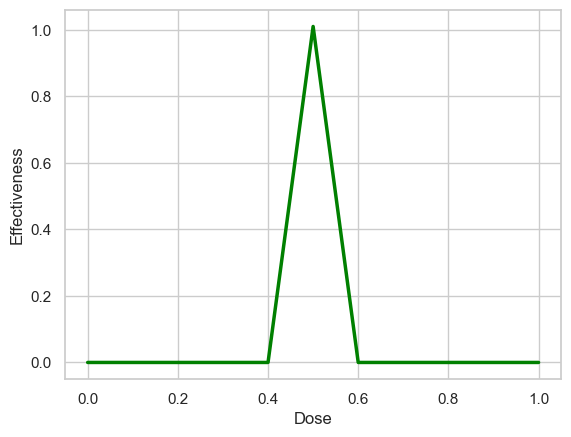

In [5]:
sns.set(style="whitegrid")
sns.lineplot(
    x=input_doses,
    y=output_values,
    color='green',
    linewidth=2.5
)
plt.ylabel('Effectiveness')
plt.xlabel('Dose')

#### basicNN_train

In [6]:
model_t = basicNN_train()

In [7]:
inputs = torch.tensor([0., 0.5, 1.])
labels = torch.tensor([0., 1., 0.])


In [8]:
optimizer = SGD(model_t.parameters(), lr=0.1)
print("final bias, before optimization:" + str(model_t.final_bias.data) + "/n")

final bias, before optimization:tensor(0.)/n


/var/folders/7z/6tydff_d7yx77mr69hghcts80000gn/T/ipykernel_5975/1384156943.py:9: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:837.)
  total_loss += float(loss)


step: 0final bias: tensor(-3.2020)

step: 1final bias: tensor(-5.7636)

step: 2final bias: tensor(-7.8129)

step: 3final bias: tensor(-9.4523)

step: 4final bias: tensor(-10.7638)

step: 5final bias: tensor(-11.8131)

step: 6final bias: tensor(-12.6525)

step: 7final bias: tensor(-13.3240)

step: 8final bias: tensor(-13.8612)

step: 9final bias: tensor(-14.2909)

step: 10final bias: tensor(-14.6348)

step: 11final bias: tensor(-14.9098)

step: 12final bias: tensor(-15.1298)

step: 13final bias: tensor(-15.3059)

step: 14final bias: tensor(-15.4467)

step: 15final bias: tensor(-15.5594)

step: 16final bias: tensor(-15.6495)

step: 17final bias: tensor(-15.7216)

step: 18final bias: tensor(-15.7793)

step: 19final bias: tensor(-15.8254)

step: 20final bias: tensor(-15.8623)

step: 21final bias: tensor(-15.8919)

step: 22final bias: tensor(-15.9155)

step: 23final bias: tensor(-15.9344)

step: 24final bias: tensor(-15.9495)

step: 25final bias: tensor(-15.9616)

step: 26final bias: tensor

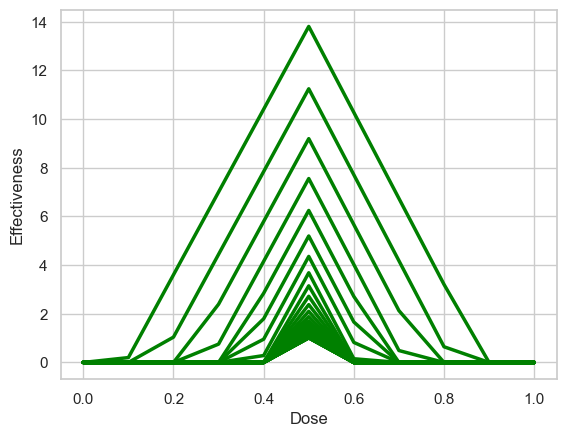

In [9]:
for epoch in range(100):
    total_loss = 0
    for iteration in range(len(inputs)):
        input_i = inputs[iteration]
        label_i = labels[iteration]
        output_i = model_t(input_i)
        loss = (output_i - label_i) ** 2
        loss.backward()
        total_loss += float(loss)
    if (total_loss<0.0001):
        print("num steps: " + str(epoch))
        break
    optimizer.step()
    optimizer.zero_grad()
    print("step: " + str(epoch) + "final bias: " + str(model_t.final_bias.data) + "\n")
    output_values_t = model_t(input_doses)
    sns.set(style="whitegrid")
    sns.lineplot(
        x=input_doses,
        y=output_values_t.detach(),
        color='green',
        linewidth=2.5
    )
    plt.ylabel('Effectiveness')
    plt.xlabel('Dose')
print("final bias, ater optimization: " + str(model_t.final_bias.data))

In [10]:
output_values_t = model_t(input_doses)

Text(0.5, 0, 'Dose')

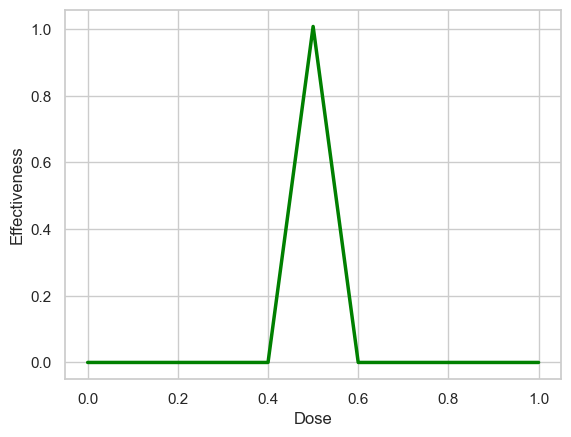

In [11]:
sns.set(style="whitegrid")
sns.lineplot(
    x=input_doses,
    y=output_values_t.detach(),
    color='green',
    linewidth=2.5
)
plt.ylabel('Effectiveness')
plt.xlabel('Dose')